In [1]:
import numpy as np
import tifffile as tiff

In [2]:
file = r"C:\Users\dongq\OneDrive\OCULAR Files\Image\05052023 mouse 3w\Image 000004.tif"

In [89]:
im = tiff.imread(file)

In [72]:
im

array([[26831,  6446,  6928, ...,  7012,  7105,  6872],
       [ 6220,  6565,  6668, ...,  6879,  7187,  6963],
       [ 6181,  6189,  6678, ...,  6842,  7096,  7331],
       ...,
       [ 6624,  6642,  6295, ...,  7011,  6993,  6809],
       [ 6462,  6375,  6338, ...,  6792,  6993,  6884],
       [ 6444,  6449,  6463, ...,  6704,  6904,  6849]], dtype=uint16)

In [50]:
immetadata = tiff.TiffFile(file).pages[0].tags

In [51]:
for i in immetadata:
    print(i)

TiffTag 254 NewSubfileType @10 LONG @18 = UNDEFINED
TiffTag 256 ImageWidth @22 LONG @30 = 1376
TiffTag 257 ImageLength @34 LONG @42 = 1024
TiffTag 258 BitsPerSample @46 SHORT @54 = 16
TiffTag 259 Compression @58 SHORT @66 = NONE
TiffTag 262 PhotometricInterpretation @70 SHORT @78 = MINISBLACK
TiffTag 266 FillOrder @82 SHORT @90 = MSB2LSB
TiffTag 273 StripOffsets @94 LONG @102 = (258,)
TiffTag 277 SamplesPerPixel @106 SHORT @114 = 1
TiffTag 278 RowsPerStrip @118 LONG @126 = 1024
TiffTag 279 StripByteCounts @130 LONG @138 = (2818048,)
TiffTag 282 XResolution @142 RATIONAL @242 = (6000000, 1000000)
TiffTag 283 YResolution @154 RATIONAL @250 = (6000000, 1000000)
TiffTag 296 ResolutionUnit @166 SHORT @174 = MICROMETER
TiffTag 339 SampleFormat @178 SHORT @186 = UINT
TiffTag 33821 @190 SHORT @198 = 60
TiffTag 33826 @202 ASCII[12041] @2818306 = <?xml version="1.0" encoding="UTF-8"
TiffTag 33827 @214 LONG @222 = 3
TiffTag 33828 @226 LONG @234 = 1


In [11]:
immetadata['XResolution'].value

<tifffile.TiffTag 282 XResolution @142>

In [9]:
resolution = (6000000, 1000000)
unit = 5

In [15]:
arr = np.asarray([[1,2,4,8,10],
                 [1,3,5,8,11],
                 [2,4,5,10,11],
                 [1,2,4,9,10]])
                 

In [105]:
hist, bins = np.histogram(arr, bins=2)
tmp = np.interp(arr.flatten(), bins[:-1], hist)
new_arr = tmp.reshape(arr.shape)

In [106]:
arr.flatten()

array([ 1,  2,  4,  8, 10,  1,  3,  5,  8, 11,  2,  4,  5, 10, 11,  1,  2,
        4,  9, 10])

In [108]:
new_arr

array([[12. , 11.2,  9.6,  8. ,  8. ],
       [12. , 10.4,  8.8,  8. ,  8. ],
       [11.2,  9.6,  8.8,  8. ,  8. ],
       [12. , 11.2,  9.6,  8. ,  8. ]])

In [97]:
hist, bins = np.histogram(im, bins=5)
new_density = np.interp(im.flatten(), bins[:-1], hist)
new_im = new_density.reshape(im.shape)
new_im = new_im.max() - new_im
# k = new_im.max() / 255 + 1
# new_im /= k
# new_im = new_im.astype(np.uint8)


(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x167c2cd7610>)

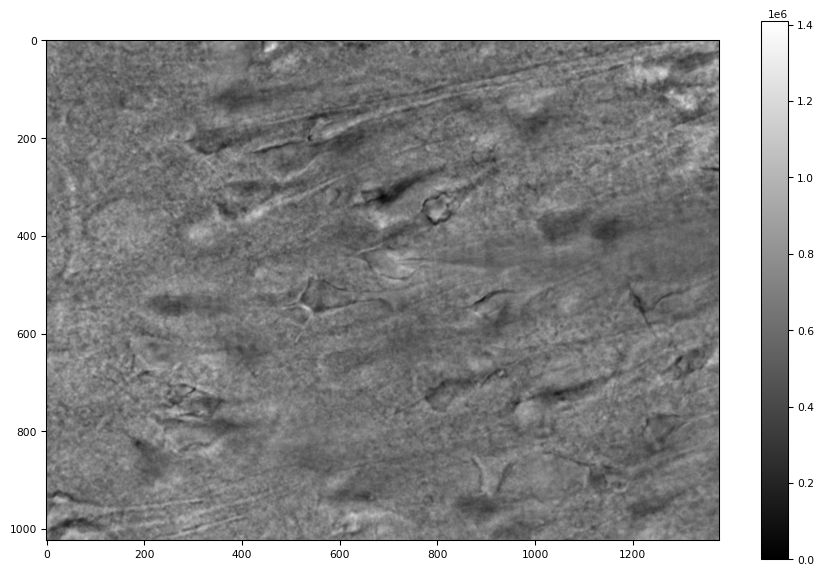

In [98]:
tiff.imshow(new_im, cmap='gray')

In [88]:
tiff.imwrite('tmp.tif', new_im)

In [18]:
# Create a new dictionary to store modified metadata
new_metadata = {}

# Copy metadata tags to the new dictionary
for tag in immetadata:
    new_metadata[tag.name] = tag.value
new_metadata['XResolution'] = (100, 4)
new_metadata['YResolution'] = resolution
new_metadata['ResolutionUnit'] = unit

In [26]:
new_metadata

{'NewSubfileType': <FILETYPE.UNDEFINED: 0>,
 'ImageWidth': 1376,
 'ImageLength': 1024,
 'BitsPerSample': 16,
 'Compression': <COMPRESSION.NONE: 1>,
 'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>,
 'FillOrder': <FILLORDER.MSB2LSB: 1>,
 'StripOffsets': (258,),
 'SamplesPerPixel': 1,
 'RowsPerStrip': 1024,
 'StripByteCounts': (2818048,),
 'XResolution': (100, 4),
 'YResolution': (6000000, 1000000),
 'ResolutionUnit': 'micron',
 'SampleFormat': <SAMPLEFORMAT.UINT: 1>,
 '33821': 60,
 '33826': '<?xml version="1.0" encoding="UTF-8" ?>\r\n<database>\r\n<attachments>\r\n<displaysettings>\r\n<brightness>0</brightness>\r\n<contrast>0</contrast>\r\n<gamma>1.00</gamma>\r\n<rgb>\r\n<brightness>0,0,0</brightness>\r\n<contrast>0,0,0</contrast>\r\n<gamma>1.00,1.00,1.00</gamma>\r\n</rgb>\r\n<displaymodes>\r\n<scan>Fixed</scan>\r\n<type>Complete</type>\r\n<framemode>Active</framemode>\r\n<complexmode>Normal</complexmode>\r\n<complexpart>Real</complexpart>\r\n<colormode>Normal</colormode>\r\n<c

In [33]:
with tiff.TiffFile(file, mode='r+') as tif:
    _ = tif.pages[0].tags['XResolution'].overwrite((96000, 1000))

In [46]:
with tiff.TiffFile(file, mode='r+') as tif:
    _ = tif.pages[0].tags['XResolution'].overwrite((96000, 12560))
    _ = tif.pages[0].tags['ResolutionUnit'].overwrite(6)

In [60]:
from PIL import Image

imm = Image.open('new_image.tif')

In [63]:
imm.info

{'compression': 'raw', 'resolution': (6.0, 6.0)}

In [65]:
imm.info['resolution'] = (434.0, 13.0)
imm.save('new_image-1.tif', format="TIFF")

In [66]:
# Create an array of values
data = np.array([1, 2, 3, 2, 4, 1, 5, 3, 2, 4, 3])

# Compute the histogram
hist, bins = np.histogram(data, bins=5)

# Print the histogram values and bin edges
print("Histogram:", hist)
print("Bin Edges:", bins)

Histogram: [2 3 3 2 1]
Bin Edges: [1.  1.8 2.6 3.4 4.2 5. ]


In [10]:
import cv2

# 加载图像数据
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

In [17]:
tmp = cv2.equalizeHist(image)

In [20]:
cv2.imwrite('tmp.tif', tmp)

True